## Data Profiling
The first step of both the Cross Industry Process for Data Mining (CRISP-DM) and the Microsoft Team Data Science Process (TDSP), is understanding the business case for the project. In other words, what problem exists that could be solved if a value could be predicted? The next step is to source and understand data that pertains to the business case. This activity (data profiling) is aimed at identifying the shape of the dataset (i.e., the number of observations and features), the data types of its features, their meaning, the number of unique values contained within each feature, and the distribution of those values. In doing so it is typical to find the data in a raw form; i.e., the data is likely to be flawed to some extent that it would require preparatory measures before it could be used to train a machine learning model. Foremost among flaws are missing data. An analysis must be performed to decide whether to impute missing data, or to simply drop features or observations that have missing values. This decision is typically driven by quantifying how much data would remain if those missing features and/or observations were excluded. This is because any treatment applied to impute replacement values may influence all subsequent activities to understand the true distribution of values within the affected features, and to identify correlations among those features.

#### Import Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#### Import the Data

In [2]:
data_dir = os.path.join(os.getcwd(), 'Data')
source_data_file = 'titanic.csv';

data_file = os.path.join(data_dir, source_data_file)
df = pd.read_csv(data_file, header=0, index_col=0)

# Ensure the index values are: seed=1, increment=1
df.reset_index(drop=True, inplace=True)

### 1.0. Perform an Initial Profile
The data being analyzed pertains to the sinking of the luxury passenger ship **Titanic**. Each observation describes an individual passenger aboard the ship at the time it sank, along with whether or not the passenger survived or perished in the disaster. The following table contains metadata describing each feature (attribute) captured to describe each passenger.

#### Data Dictionary:
<div style="margin-left: 0 px; margin-right: auto; width: 60%"> 
    
| Variable  | Description                        | Details                                        |
| ----------|:-----------------------------------|:---------------------------------------------- |
| survived  | Survival	                         | 0 = No; 1 = Yes                                |
| name      | First & Last Name                  | Given Name & Surname	                          |
| sex       | Gender                             | Male or Female                                 |
| age       | Age                                | Numeric representing years                     |
| sibsp     | Number of Siblings/Spouses Aboard	 | 1 = Spouse; >1 = # Siblings                    |
| parch     | Number of Parents/Children Aboard	 |                                                |
| ticket    | Ticket Number                      | Ticket number purchased                        |
| fare      | Passenger Fare                     | The cost of the passenger's ticket             |
| cabin     | Cabin                              | The cabin number                               |
| embarked  | Port of Embarkation                | C = Cherbourg; Q = Queenstown; S = Southampton |
| boat      | The lifeboat they boarded          | Lifeboat number                                |
| body      | Body Weight                        | Numerical value (decimal)                      |
| home.dest | Passengers home & destination      | Textual value                                  |

</div>

#### 1.1. Quantify the Observations and Features

In [3]:
print(f"Shape: {df.shape[0]} Observations x {df.shape[1]} Features")

Shape: 1309 Observations x 13 Features


#### 1.2. Determine which Features are Numerical and which are Categorical

In [4]:
df.head()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The **Target** variable *(survived)* is easily identified and can be seen to contain binary numeric values; making this a binary classification experiment. The **sex** feature also contains binary values, although they are textual. The **age** and **fare** features contain numerical values, as do the **sibsp** and **parch** features. Missing values (NaN) can be seen in both the **boat** and **body** features, and the **home.dest** feature contains brief textual descriptions. The **boat** feature contains *numerical* values, but is actually a categorical feature. The same is true regarding the **ticket** feature; however, it isn't obvious whether its values are naturally ordered, making it an *Ordinal* categorical feature, or if they have no natural ordering, making it a *Nominal* categorical variable. The **embarked** and **cabin** features are very clearly categorical data. Finally, we observe the **name** feature uniquely identifies each observation (passenger), and is therefore of no consequence to predicting whether a new (unseen) passenger would be likely to survive or perish.

#### 1.3. Inspect each Feature's Data Type

In [5]:
df.dtypes

survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

#### 1.4. Inspect the Cardinality (number of unique values) of each Feature?

In [6]:
df.nunique()

survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         181
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

#### 1.5. Inspect each Feature's Unique Values

In [7]:
unique_values = []
for col in df.columns:
    unique_values.append(df[col].unique())

pd.DataFrame(list(zip(df.columns, unique_values)), columns=['Feature', 'Unique Values'])

,Feature,Unique Values
0,survived,"[1, 0]"
1,name,"[Allen, Miss. Elisabeth Walton, Allison, Maste..."
2,sex,"[female, male]"
3,age,"[29.0, 0.9167, 2.0, 30.0, 25.0, 48.0, 63.0, 39..."
4,sibsp,"[0, 1, 2, 3, 4, 5, 8]"
5,parch,"[0, 2, 1, 4, 3, 5, 6, 9]"
6,ticket,"[24160, 113781, 19952, 13502, 112050, 11769, P..."
7,fare,"[211.3375, 151.55, 26.55, 77.9583, 0.0, 51.479..."
8,cabin,"[B5, C22, E12, D7, A36, C101, nan, C62, B35, A..."
9,embarked,"[S, C, nan, Q]"


These initial profiling techniques reveal that some features having numerical data types may in fact contain categorical data (e.g., survived, sibsp, parch). To better understand their meaning and influence it may be advantageous to convert them from their present numerical types to the **Object** type to indicate their categorical nature. What's more, it may be worthwhile to research their meaning for the sake of mapping descriptive labels to the existing numerical values. 

#### 1.6. Identify Duplicated Observations
The initial profile has also revealed that, although there are 1309 observations in our datset, there are only 1307 unique values in the **name** feature. This indicates that we have a couple of duplicate observations; therefore, we may wish to remove them.

In [8]:
df[df.duplicated(subset='name', keep=False) == True]

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


Here we observe that two passengers (Kate Connolly and James Kelly) have duplicate records. In each case, the first instance contains fewer missing values (NaN) so it should make sense to keep them and discard the second instances; however, we also observe conflicting data points between the duplicate records (e.g., age, ticket, fare, embarked) which also poses the question "Which values are accurate, and which are not?" The only way to determine which values are correct is to perform additional research, and this is a common scenerio a data scientist might encounter. To ensure the veracity of source data, it's important to maintain effective communications with business analysts, subject matter experts, data engineers, and data stewards.

### 2.0. Quantify Any Missing Data
#### 2.1. Inspect the number of missing values per feature?

In [9]:
df.isnull().sum().sort_values(ascending=True)

survived        0
name            0
sex             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        2
age           263
home.dest     564
boat          823
cabin        1014
body         1188
dtype: int64

Text(0.5, 1.0, 'Quantifying Missing Data (Counts)')

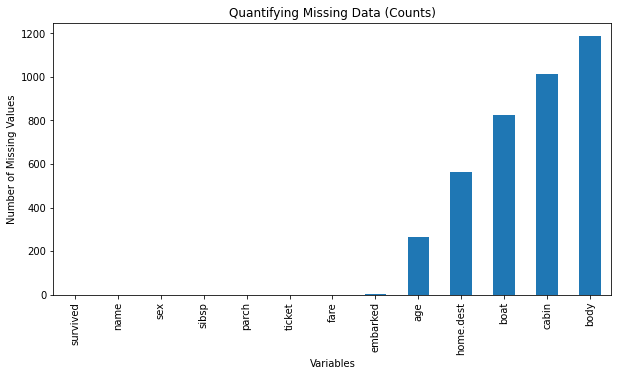

In [10]:
df.isnull().sum().sort_values(ascending=True).plot.bar(figsize=(10,5))
plt.ylabel('Number of Missing Values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data (Counts)')

#### 2.2. Inspect the Percentage of Missing Values per Feature?

In [11]:
df.isnull().mean().sort_values(ascending=True)

survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

Text(0.5, 1.0, 'Quantifying Missing Data (Percentage)')

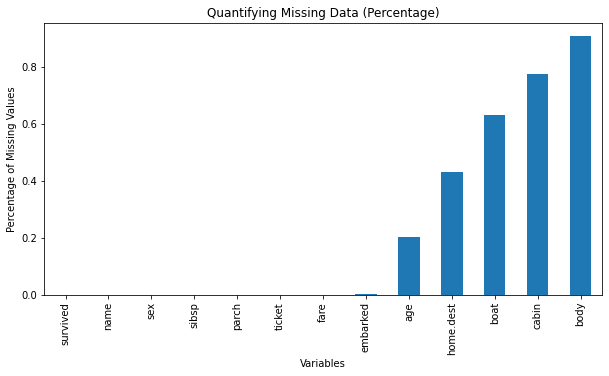

In [12]:
df.isnull().mean().sort_values(ascending=True).plot.bar(figsize=(10,5))
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data (Percentage)')

From these execises we can clearly see that 5 of the 13 features contain a significant number (or percentage) of missing values: age (0.20%), home.dest (0.43%), boat (0.63%), cabin (0.77%), body (0.91%). As the percentage of missing values exceeds 50% we may ask ourselves if enough data remains in those features to impute new values using the mean, median or mode of the remaining observations. What's more, we would have to wonder if these features would be influential even if they were complete.

### 3.0. Inspect the Distribution of Values per Feature
#### 3.1. Separate Numerical and Categorical Features
Because numerical values often tend to be continuous while categorical values are inherently discrete, it is advantageous to separate them to make it easier to apply appropriate visualization techniques and/or feature engineering techniques.

In [13]:
numerical_cols = [col for col in df.columns if df.dtypes[col] != 'O']
categorical_cols = [col for col in df.columns if col not in numerical_cols]

#### 3.2. Evaluate the Statistical Distribution of the Numerical Features

In [14]:
df[numerical_cols].describe()

,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


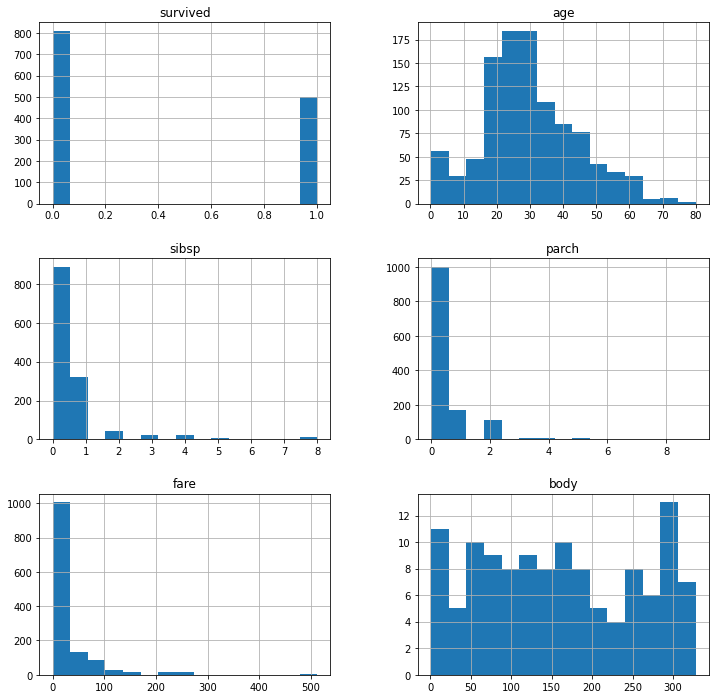

In [15]:
df[numerical_cols].hist(figsize=(12,12), bins=15)
plt.show()

#### 3.3. Identify Any Outliers
An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

According to the IQR (inter-quantile range) proximity rule, a value is an outlier if it falls outside an upper boundary, *defined as 75th quantile + (IQR * 1.5)*, or a lower boundary, *defined as 25th quantile - (IQR * 1.5)*, where the inter-quantile range (IQR) is defined as *(75th quantile - 25th quantile)*.

In the boxplots displayed below, the **IQR** is indicated by the (inner) box, the **median** is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers mark the **proximity rule boundaries** as described above. Values that fall outside the whiskers are considered outliers; however, further research may be required to determine if these values are in fact erroneous, or if they represent the general truth.

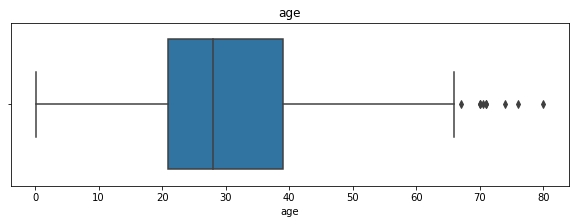

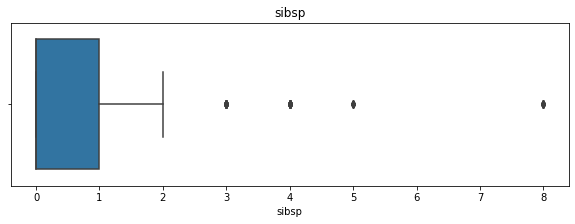

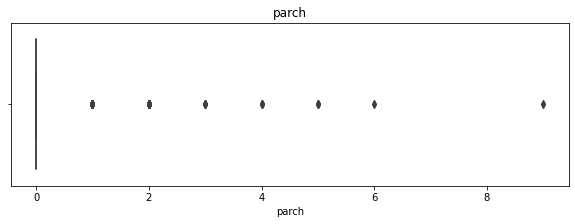

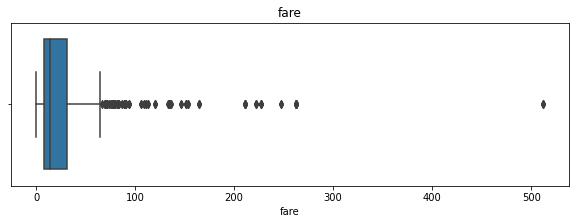

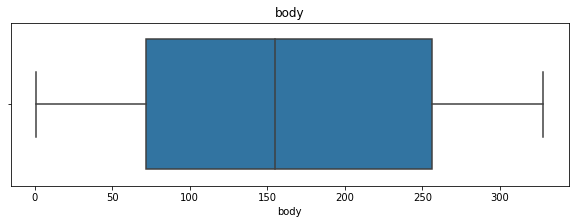

In [16]:
numerical_cols.remove('survived')
for col in numerical_cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[col])
    plt.title(col)

#### 3.4. Evaluate the Distribution of Categorical Features
The distribution of categorical features is determined by comparing the count of each category relative to the whole. Customary visualizations for this task are the Bar Chart and the Frequency Table. 

In [17]:
df[categorical_cols].head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"


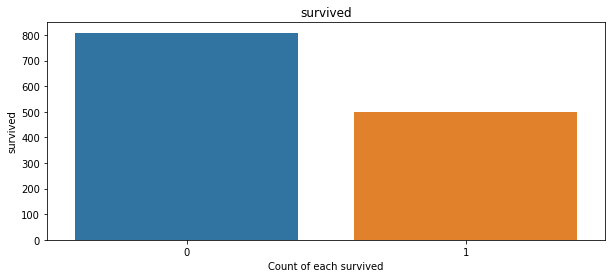

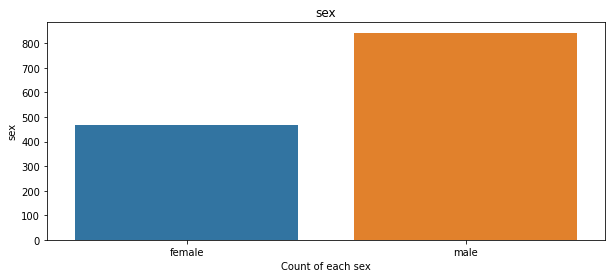

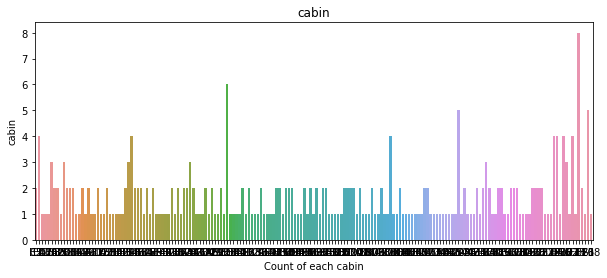

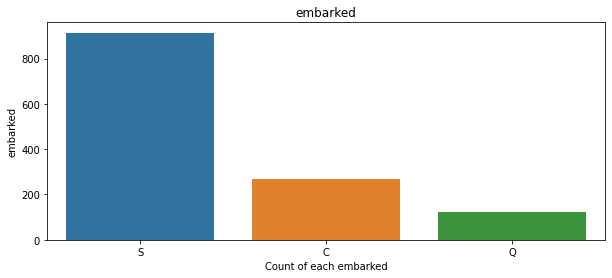

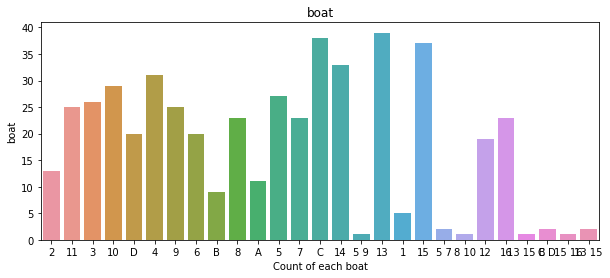

In [18]:
cols = df[['survived','sex','cabin','embarked','boat']]

for col in cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel("Count of each {0}".format(col))
    plt.ylabel(col)
    plt.show()

#### 3.5. Identify any Rare Categories in Categorical Features
While some categories (labels) appear frequently in categorical features, others may occur less often. In fact, it is quite typical for one or more categories to appear in a large percentage of the observations, while the remaining categories appear in a very small percentage. If a value appears very infrequently (e.g., less than 5%) then it may be considered *rare*. The only features that may contain *rare* categories are **cabin** and **boat**, so this exercise will focus on them.

In [24]:
for col in ['cabin','boat']:
    survived = pd.crosstab(index=df[col], columns=["Percent"], colnames=[""])
    survived = survived.sort_values(by=['Percent'], ascending=True)
    display(round(survived/survived.sum(), 3))

,Percent
cabin,
A10,0.003
D22,0.003
D11,0.003
C99,0.003
C97,0.003
...,...
C22,0.014
B57,0.017
G6,0.017


,Percent
boat,
8 10,0.002
13 15 B,0.002
5 9,0.002
15 16,0.002
13 15,0.004
5 7,0.004
C D,0.004
1,0.010
B,0.019


##### View Rare Occurances by Count
In some cases it may be more intuitive to view occurances by *count* rather than by *percentage*.

In [26]:
for col in ['cabin','boat']:
    survived = pd.crosstab(index=df[col], columns=["Percent"], colnames=[""])
    survived = survived.sort_values(by=['Percent'], ascending=True)
    display(survived)

,Percent
cabin,
A10,1
D22,1
D11,1
C99,1
C97,1
...,...
C22,4
B57,5
G6,5


,Percent
boat,
8 10,1
13 15 B,1
5 9,1
15 16,1
13 15,2
5 7,2
C D,2
1,5
B,9
